In [1]:
from pca import pca
import matplotlib.pyplot as plt
import  numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
milk=pd.read_csv(r'..\Datasets\milk.csv',index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [3]:
prcomp=PCA().set_output(transform='pandas')
scaler=StandardScaler().set_output(transform='pandas')
milk_scaled=scaler.fit_transform(milk)
components=prcomp.fit_transform(milk_scaled)

In [4]:
model = pca()
results= model.fit_transform(milk_scaled,col_labels=milk.columns,row_labels=list(milk.index))


[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[30-04-2025 12:36:53] [scatterd.scatterd] [INFO] Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


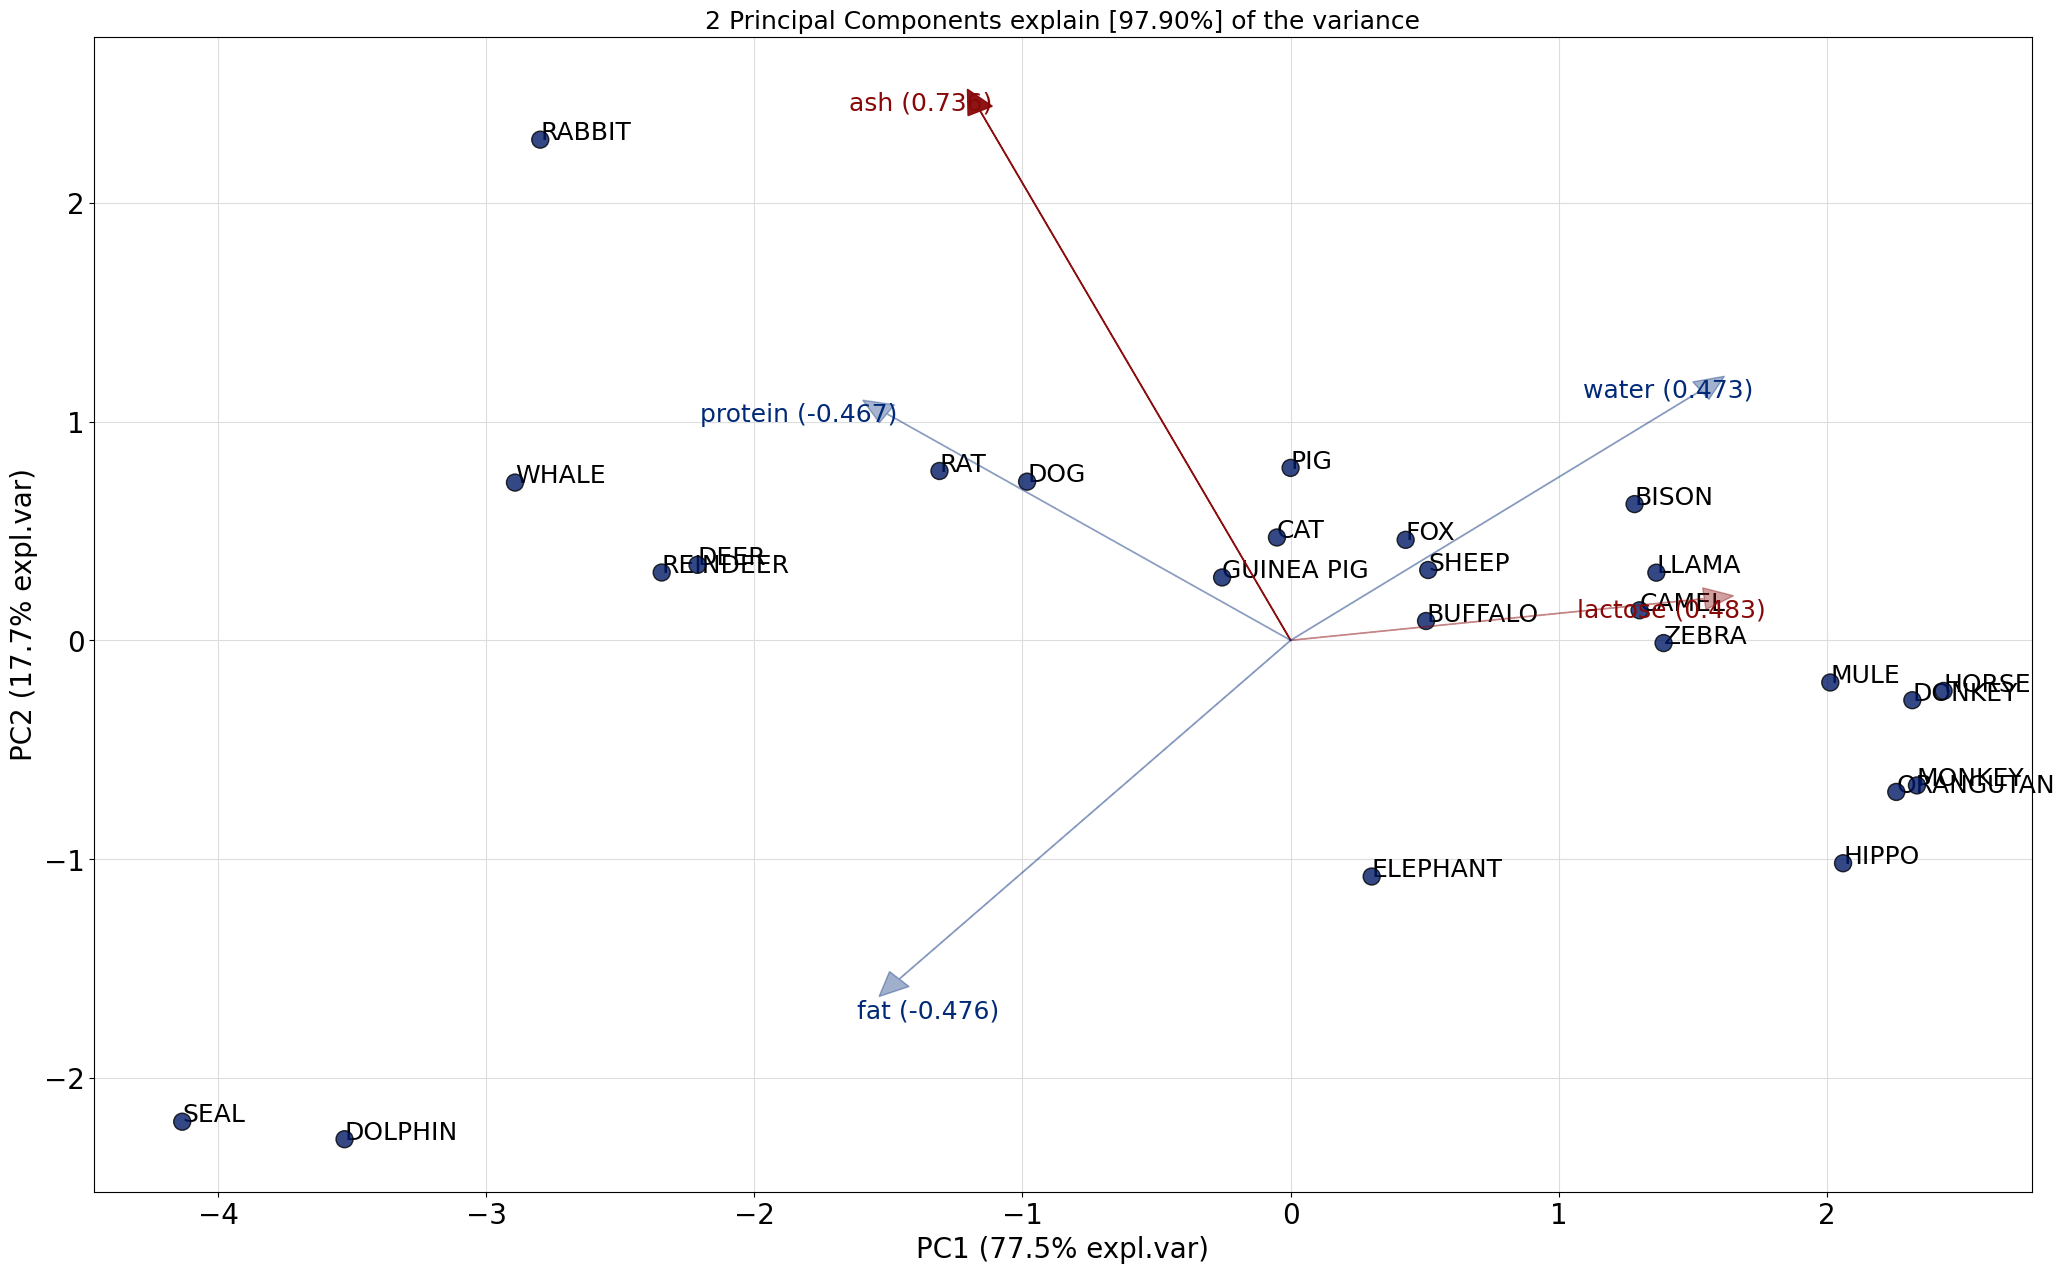

In [5]:
model.biplot(label=True,legend=True)
for i in np.arange(0,milk.shape[0]):
    plt.text(components.values[i, 0], components.values[i, 1], list(milk.index)[i])
plt.show()

### for nutrients


[30-04-2025 12:41:20] [scatterd.scatterd] [INFO] Create scatterplot


[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


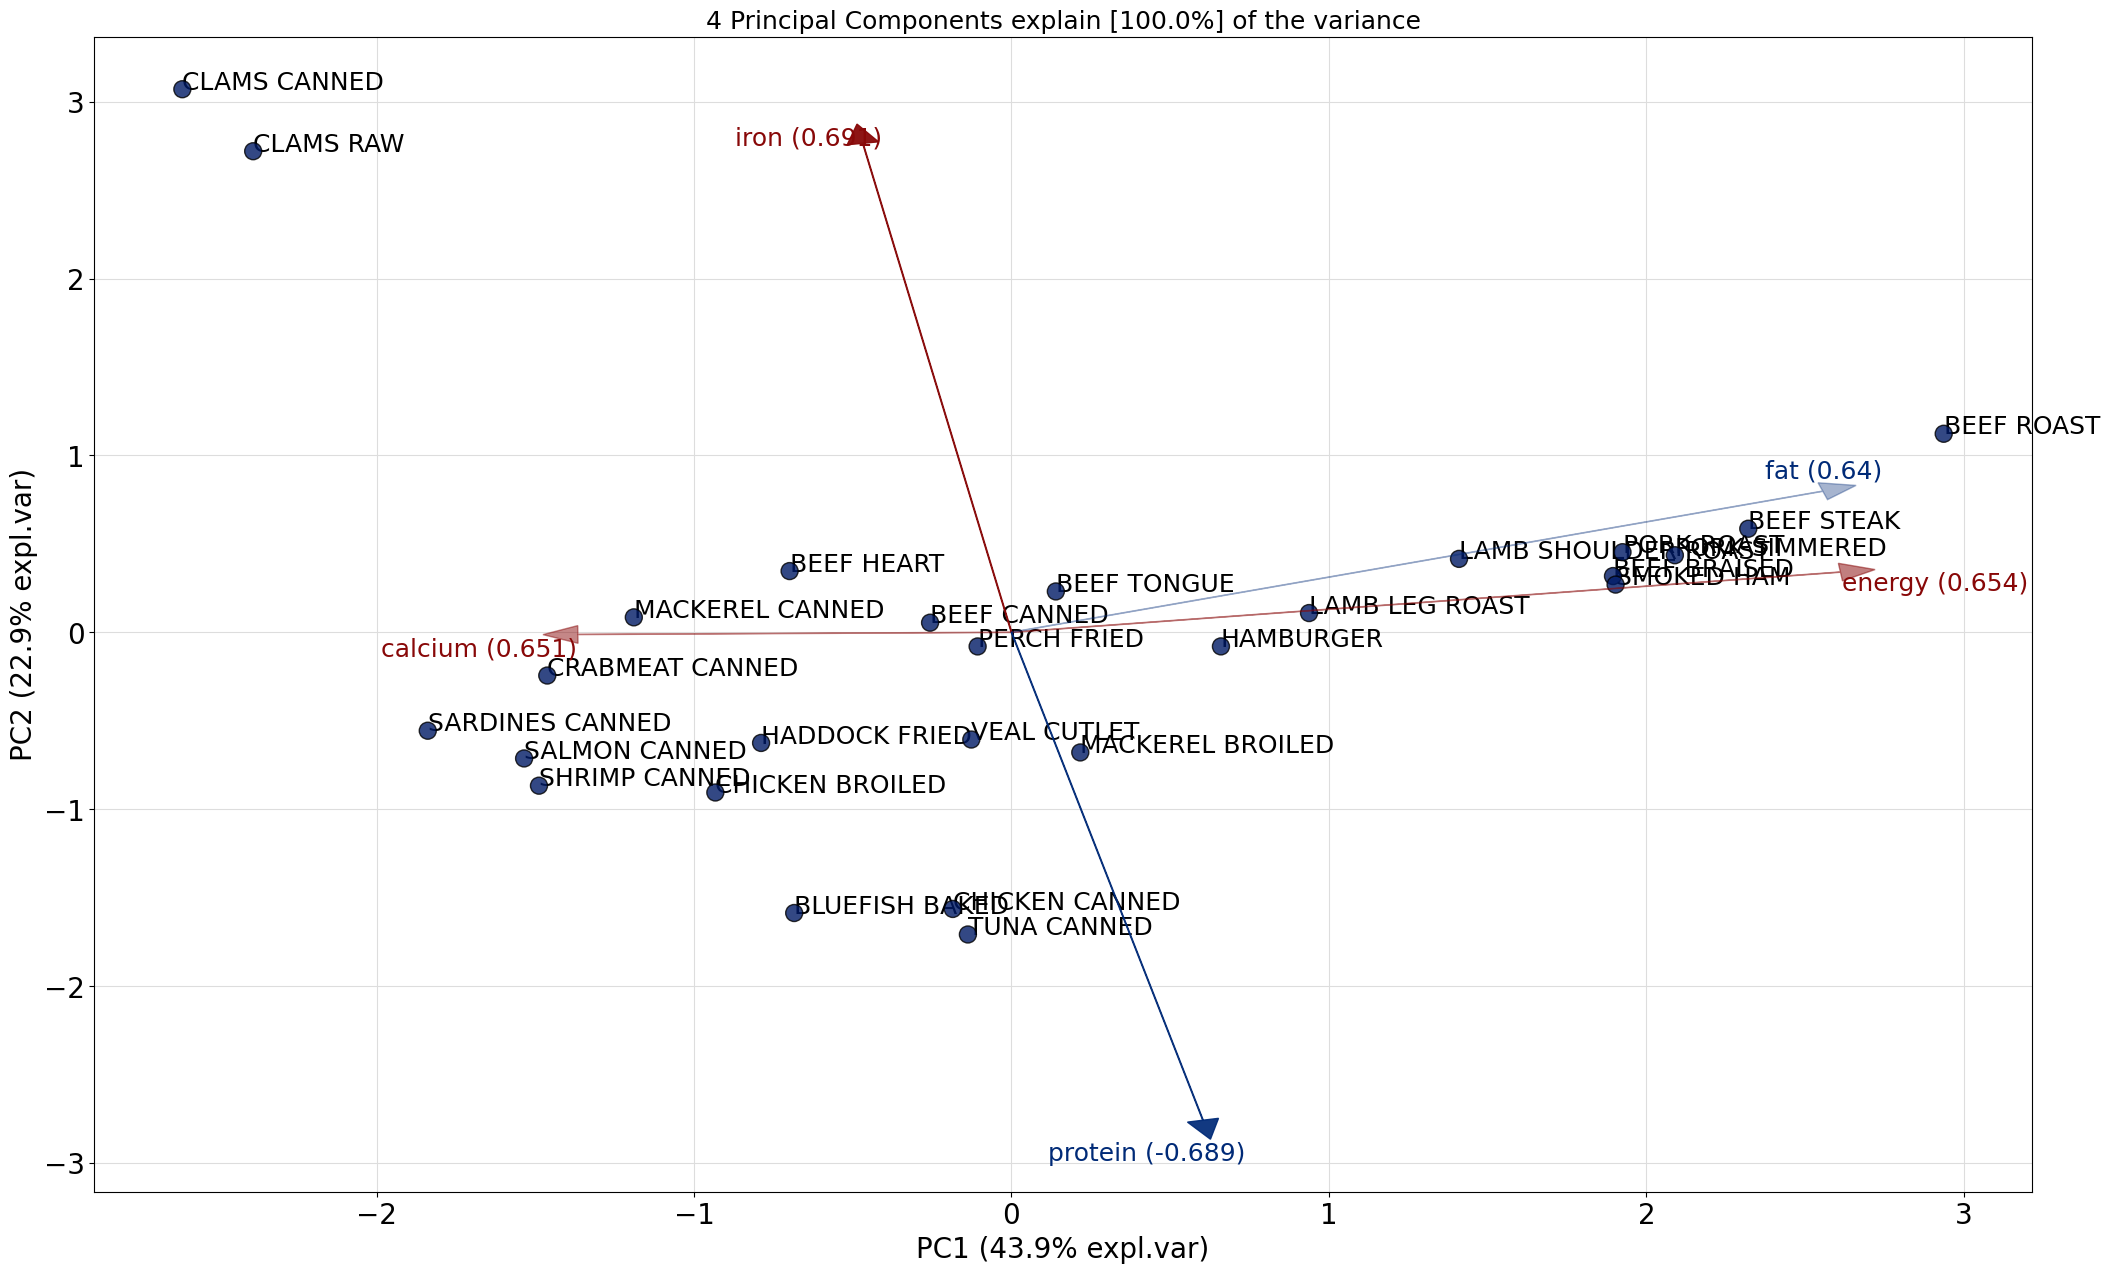

In [ ]:
nutrients=pd.read_csv(r'..\Datasets\nutrient.csv',index_col=0)
nutrients.head()
prcomp=PCA().set_output(transform='pandas')
scaler=StandardScaler().set_output(transform='pandas')
nutrients_scaled=scaler.fit_transform(nutrients)
components=prcomp.fit_transform(nutrients_scaled)
model = pca()
results= model.fit_transform(nutrients_scaled,col_labels=nutrients.columns,row_labels=list(nutrients.index))

model.biplot(label=True,legend=True)
for i in np.arange(0,nutrients.shape[0]):
    plt.text(components.values[i, 0], components.values[i, 1], list(nutrients.index)[i])
plt.show()


In [12]:
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)

ct=make_column_transformer((ohe,make_column_selector(dtype_include=object)),('passthough',make_column_selector(dtype_exclude=object)),verbose_feature_names_out=False)

In [ ]:
x_train_ohe=ct.fit_transform